In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

## Visualizing charts
plt.rcParams['figure.figsize']=[15,6]

## Train Test Split

In [4]:
sales=pd.read_csv('~/Downloads/train_XnW6LSF.csv')
sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
# Library to import Train and test split

from sklearn.model_selection import train_test_split

In [9]:
# split the data in X and y
X=sales.drop('Item_Outlet_Sales',axis=1)
y=sales.Item_Outlet_Sales

In [11]:
# Split the X and Y in train and test
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.20,random_state=0)

In [12]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(xtest.shape)

(6818, 11)
(6818,)
(1705, 11)
(1705, 11)


### Transformations 

* Log Transformation => It does not work on 0 or -ve values
* Square root Transformation => It cannot work on -ve numbers
* Power Transformation (1/x) => It cannot work on 0's
* Boxcox Transformation => Only +ve numbers
* Yeo Johnson Transformation => Can work on any number

Remember that the purpose of the transformation is to reduce the skewness & trying to make the data normal

You cannot make the data perfectly normal, however, you can reduce the skewness a little bit

In [16]:
# Apply the Transformation and check the skewness post transformation

# Log Transformation 

import scipy.stats as stats

print('Before Transformation:',sales.Item_Outlet_Sales.skew())
print('After Transformation:',np.log(sales.Item_Outlet_Sales.skew()))

Before Transformation: 1.1775306028542796
After Transformation: 0.16341953625587285


In [17]:
# Square Root Transformation 

print('Before Transformation:',sales.Item_Outlet_Sales.skew())
print('After Transformation:',np.sqrt(sales.Item_Outlet_Sales.skew()))

Before Transformation: 1.1775306028542796
After Transformation: 1.0851408216698326


In [20]:
# Power Transformation 

print('Before Transformation:',sales.Item_Outlet_Sales.skew())
print('After Transformation:',(1/sales.Item_Outlet_Sales).skew())

# So if the data is -vely skewed, we can try Power Transformation to reduce the skewness in the -ve direction

Before Transformation: 1.1775306028542796
After Transformation: 5.679237323396784


In [28]:
# Boxcox Transformation 

print('Before Transformation:',sales.Item_Outlet_Sales.skew())
print('After Transformation:',pd.Series(stats.boxcox(sales.Item_Outlet_Sales)[0]).skew())

Before Transformation: 1.1775306028542796
After Transformation: -0.07497811874852083


In [29]:
# Yeo Johnson Transformation 

print('Before Transformation:',sales.Item_Outlet_Sales.skew())
print('After Transformation:',pd.Series(stats.yeojohnson(sales.Item_Outlet_Sales)[0]).skew())

Before Transformation: 1.1775306028542796
After Transformation: -0.07479060807210593


In [25]:
stats.boxcox(np.array([23,78,0,-500]))

ValueError: Data must be positive.

In [26]:
np.log(np.array([23,78,0,-500]))

array([3.13549422, 4.35670883,       -inf,        nan])

### Summary

* Log Transformation,Box Cox and Yeo Johnsom returned -ve skewness
* Where as Square Root reduced the Skewness for the Target variable
* In Power Transformation,it increases the skewness and seems like it is a good fit for -vely skewed data

Note : The purpose of the Transformation is to reduce the skewness. So, if the data is quite close to normal,then we skip this step and directly build the model

Text(0.5, 1.0, 'Before Transformation')

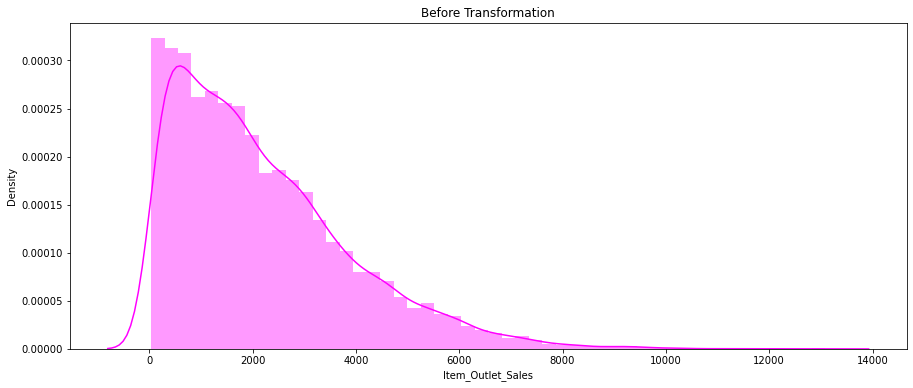

In [32]:
sns.distplot(sales.Item_Outlet_Sales,kde=True,hist=True,color='magenta')
plt.title('Before Transformation')

Text(0.5, 1.0, 'SQRT Transformation')

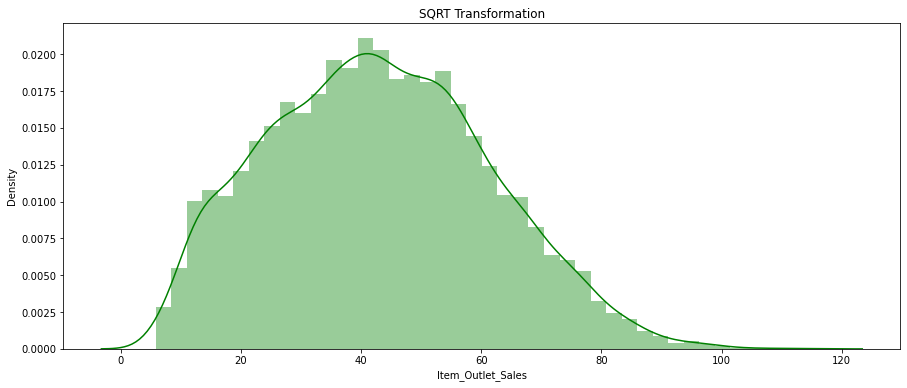

In [34]:
sns.distplot(np.sqrt(sales.Item_Outlet_Sales),kde=True,hist=True,color='green')
plt.title('SQRT Transformation')